In [1]:
import socket
import strax
import straxen
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import pandas as pd

from multihist import Hist1d, Histdd
import time
import itertools
import os

from scipy import stats
from straxen import units
from scipy.optimize import curve_fit

import peaks_utility as psu
import drift_diffusion_utility as ddu
import s2widthcut_utility as wcu
import math
from datetime import datetime, timedelta
import cutax
from straxen.get_corrections import get_correction_from_cmt
from cutax.cuts import *

%load_ext autoreload
%autoreload 2

#import importlib
#importlib.reload(cutax)

In [2]:
straxen.print_versions()

,module,version,path,git
0,python,3.8.13,/opt/XENONnT/anaconda/envs/XENONnT_2022.06.3/b...,None
1,strax,1.2.3,/opt/XENONnT/anaconda/envs/XENONnT_2022.06.3/l...,None
2,straxen,1.7.1,/opt/XENONnT/anaconda/envs/XENONnT_2022.06.3/l...,None
3,cutax,1.12.0,/dali/lgrandi/xenonnt/software/cutax/v1.12.0/c...,None


In [3]:
st = cutax.contexts.xenonnt_v8(cut_list=[cutax.cut_lists.basic.BasicCuts,  cutax.cut_lists.s2width_test.S2Width])
#cutax.cut_lists.science.LowER
#cutax.cut_lists.science.WIMP
#config = st.show_config('cut_s2_width_strict')
#mask = (config['option']=='diffusion_constant')
#config[mask]
FiducialVolume = st.get_single_plugin('030000', 'cut_fiducial_volume')

In [4]:
dsets = st.select_runs(include_tags='*sr0*',run_mode='tpc_radon',available='event_info')

Checking data availability:   0%|          | 0/3 [00:00<?, ?it/s]

In [32]:
rn_runs = np.array(dsets['name'])

In [33]:
len(rn_runs)

289

In [7]:
evRn = wcu.merge_runs_cutax(st,rn_runs)

/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

Reading runs from 019769 to 024075


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

n. 4 run 023991 elapsed time: 40.02 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 9 run 023936 elapsed time: 72.36 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

n. 14 run 023834 elapsed time: 126.48 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 19 run 023713 elapsed time: 164.76 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

n. 24 run 023384 elapsed time: 193.19 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:102: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:102: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:106: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:106: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeW

n. 29 run 022892 elapsed time: 228.86 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 34 run 022874 elapsed time: 255.45 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

n. 39 run 022827 elapsed time: 279.98 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 44 run 022803 elapsed time: 305.28 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 49 run 022788 elapsed time: 333.71 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 54 run 022773 elapsed time: 365.44 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:102: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:102: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:106: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

n. 59 run 022723 elapsed time: 394.26 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

n. 64 run 022682 elapsed time: 422.43 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

n. 69 run 022664 elapsed time: 450.51 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

n. 74 run 022647 elapsed time: 481.89 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 79 run 022589 elapsed time: 527.00 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 84 run 022571 elapsed time: 557.85 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 89 run 022534 elapsed time: 585.82 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

n. 94 run 022519 elapsed time: 613.82 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 99 run 022504 elapsed time: 643.13 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

n. 104 run 022486 elapsed time: 674.18 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

n. 109 run 022445 elapsed time: 704.68 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 114 run 022430 elapsed time: 733.55 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 119 run 022415 elapsed time: 764.70 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 124 run 022360 elapsed time: 794.30 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 129 run 022345 elapsed time: 825.35 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 134 run 022330 elapsed time: 857.74 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 139 run 022312 elapsed time: 892.60 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_width.py:29: RuntimeWarn

n. 144 run 022253 elapsed time: 925.55 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_width.py:29: RuntimeWarn

n. 149 run 022219 elapsed time: 959.75 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

n. 154 run 022180 elapsed time: 998.83 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

n. 159 run 022058 elapsed time: 1035.98 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 164 run 022043 elapsed time: 1069.92 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 169 run 022028 elapsed time: 1105.90 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_width.py:29: RuntimeWarn

n. 174 run 022013 elapsed time: 1144.17 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

n. 179 run 021993 elapsed time: 1183.54 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 184 run 021969 elapsed time: 1224.90 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 189 run 020132 elapsed time: 1259.06 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 194 run 020118 elapsed time: 1291.30 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:245: RuntimeWarning: divide by zero encountered in true_divide
  return flat + (amp / np.clip(s2_area_top, 0, cutoff)) ** power
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax

n. 199 run 020106 elapsed time: 1324.85 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 204 run 020095 elapsed time: 1357.48 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 209 run 020083 elapsed time: 1390.67 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

n. 214 run 020073 elapsed time: 1425.64 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 219 run 020061 elapsed time: 1459.42 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_width.py:29: RuntimeWarn

n. 224 run 020051 elapsed time: 1493.10 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:245: RuntimeWarning: divide by zero encountered in true_divide
  return flat + (amp / np.clip(s2_area_top, 0, cutoff)) ** power
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax

n. 229 run 020041 elapsed time: 1528.93 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 234 run 020029 elapsed time: 1563.96 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 239 run 020019 elapsed time: 1599.00 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_width.py:29: RuntimeWarn

n. 244 run 020003 elapsed time: 1636.31 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 249 run 019990 elapsed time: 1673.96 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 254 run 019972 elapsed time: 1711.72 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_width.py:29: RuntimeWarning: invalid value encountered in power
  ret = p0 / (x ** p1) + p2 + p3 * x ** p4
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_width.py:35: RuntimeWarning: invalid value encountered in power
  ret =  p0 * np.power(x, p1) * np.exp(-p2 * x) + p3 + p4 * x
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/naive_bayes_classifier.py:39: RuntimeWarning: invalid value encountered in power
  ret = p0 * np.power(x, p1) * np.exp(-p2 * (x - p3))
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:245: Run

n. 259 run 019837 elapsed time: 1747.63 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_width.py:29: RuntimeWarn

n. 264 run 019827 elapsed time: 1783.62 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 269 run 019816 elapsed time: 1821.67 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_patte

n. 274 run 019806 elapsed time: 1858.16 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_width.py:29: RuntimeWarn

n. 279 run 019797 elapsed time: 1896.79 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWar

n. 284 run 019785 elapsed time: 1936.70 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:167: RuntimeWarning: divide by zero encountered in true_divide
  return ( s2_width_50p**2 - self.config['s2_secondary_sc_width']**2 ) / self.s2_width_model(drift_time)**2
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/soft

In [8]:
len(evRn)

12299124

In [4]:
#evRn.to_hdf('20220603_sr0_rn220_v8.h5', key='df', mode='w')
evRn = pd.read_hdf('20220603_sr0_rn220_v8.h5', key='df')

In [5]:
evRn_w = evRn[wcu.all_cuts(evRn,wimps=1)]
evRn_l = evRn[wcu.all_cuts(evRn,low_er=1)]

In [10]:
dsets = st.select_runs(include_tags='*sr0*',run_mode='tpc_ar37',available='event_info')

In [11]:
ar_runs = np.array(dsets['name'])

In [20]:
evAr = wcu.merge_runs_cutax(st,ar_runs[:15])

/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *


Reading runs from 034633 to 034731


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_width.py:29: RuntimeWarning: invalid value encountered in power
  ret = p0 / (x ** p1) + p2 + p3 * x ** p4
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_width.py:35: RuntimeWarning: invalid value encoun

n. 4 run 034695 elapsed time: 37.67 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:159: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_width.py:29: RuntimeWarn

n. 9 run 034668 elapsed time: 85.33 s


/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s2_width.py:150: RuntimeWarning: invalid value encountered in sqrt
  return self.sigma_to_r50p * np.sqrt(2 * self.diffusion_constant *
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:102: RuntimeWarning: invalid value encountered in sqrt
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:102: RuntimeWarning: invalid value encountered in power
  return a1**2 * x**(1/2) + b1 * x + c1 * x**(3/2) + d1
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:106: RuntimeWarning: invalid value encountered in sqrt
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:106: RuntimeWarning: invalid value encountered in power
  return a3**2 * x**(1/2) + b3 * x + c3 * x**(3/2) + d3
/dali/lgrandi/xenonnt/software/cutax/v1.12.0/cutax/cuts/s1_pattern.py:155: RuntimeW

In [6]:
#evAr.to_hdf('20220603_sr0_ar37_v8.h5', key='df', mode='w')
evAr = pd.read_hdf('20220603_sr0_ar37_v8.h5', key='df')

In [7]:
evAr_w = evAr[wcu.all_cuts(evAr,wimps=1,s2_cut=800)]
evAr_l = evAr[wcu.all_cuts(evAr,low_er=1,s2_cut=800)]

In [8]:
evLowER = pd.concat([evRn_l[evRn_l['s2_area']>2500],evAr_l[evAr_l['s2_area']<2500]])
evWIMPs = pd.concat([evRn_w[evRn_w['s2_area']>2500],evAr_w[evAr_w['s2_area']<2500]])

/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:654: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/home/valerioda/.local/lib/python3.8/site-packages/multihist-0.6.5-py3.8.egg/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),
/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:654: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/home/valerioda/.local/lib/python3.8/site-packages/multihist-0.6.5-py3.8.egg/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


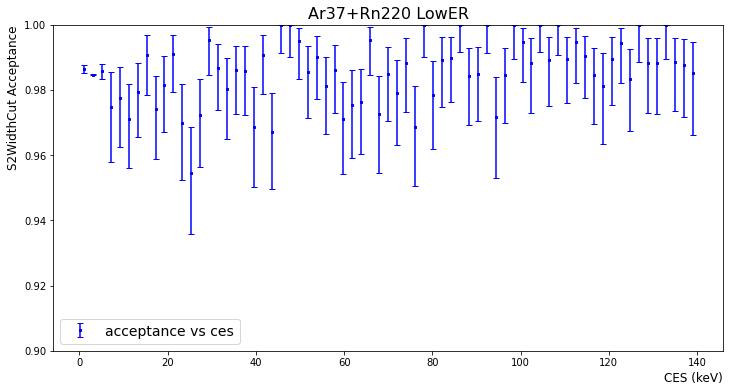

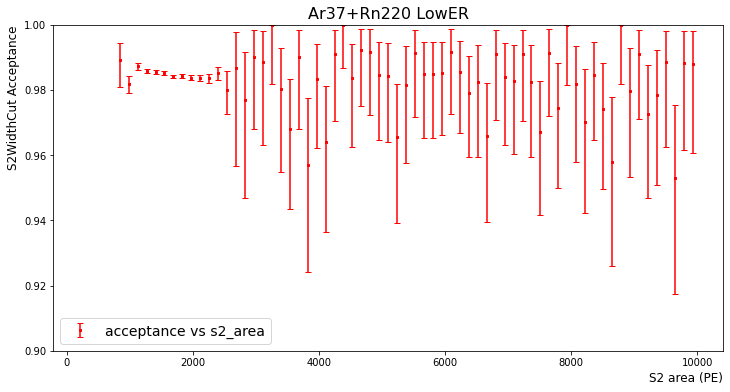

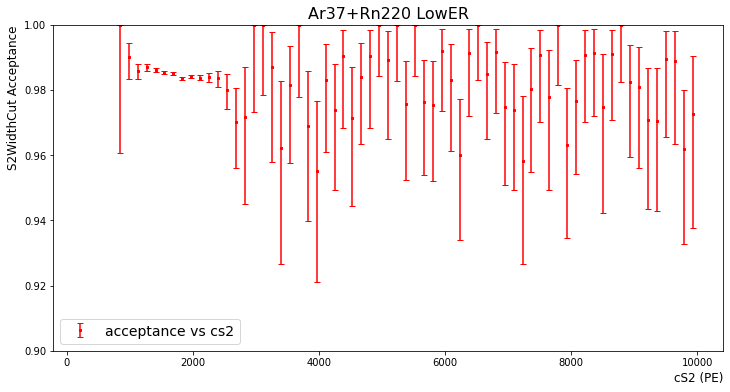

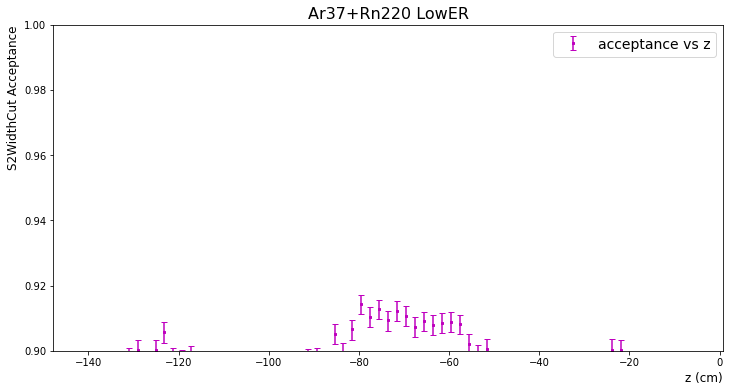

In [29]:
accLowER = wcu.get_acceptance(evLowER, evLowER['cut_s2_width_wire_modeled_low_er'],title='Ar37+Rn220 LowER', alim=(0.9,1))

/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:654: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/home/valerioda/.local/lib/python3.8/site-packages/multihist-0.6.5-py3.8.egg/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),
/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:654: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/home/valerioda/.local/lib/python3.8/site-packages/multihist-0.6.5-py3.8.egg/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),
/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:654: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/home/valerioda/.local/lib/python3.8/site-packages/multihist-0.6.5-py3.8.egg/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(

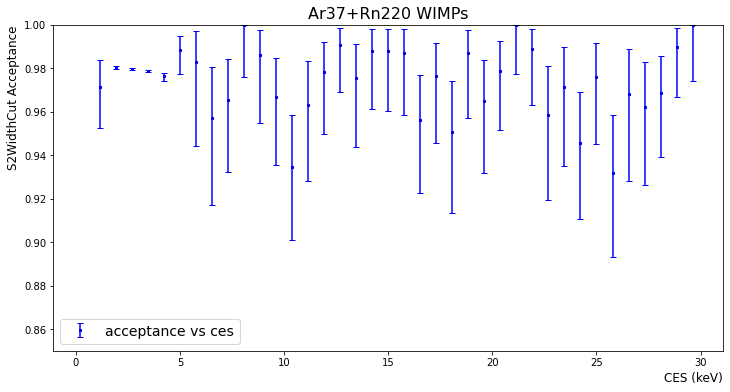

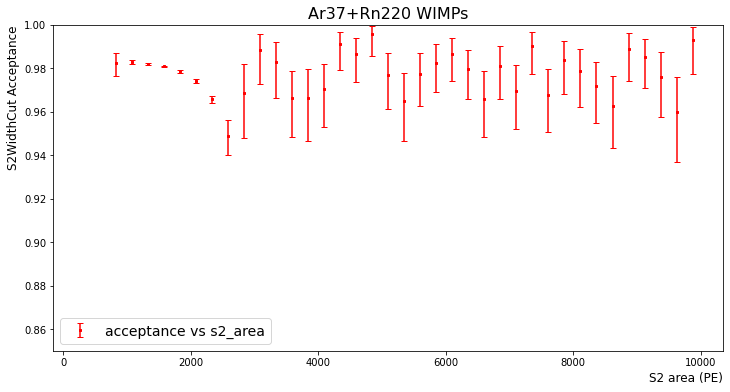

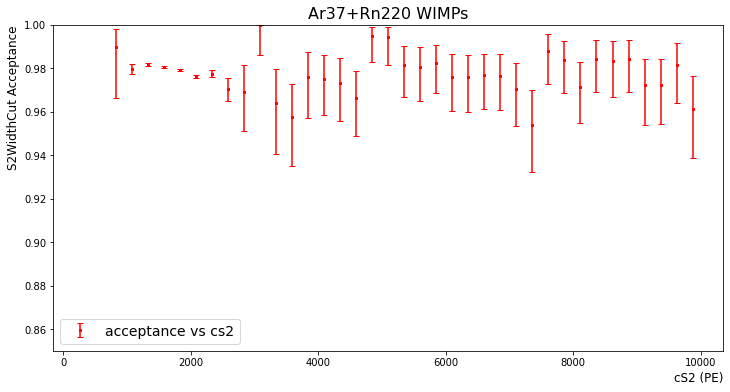

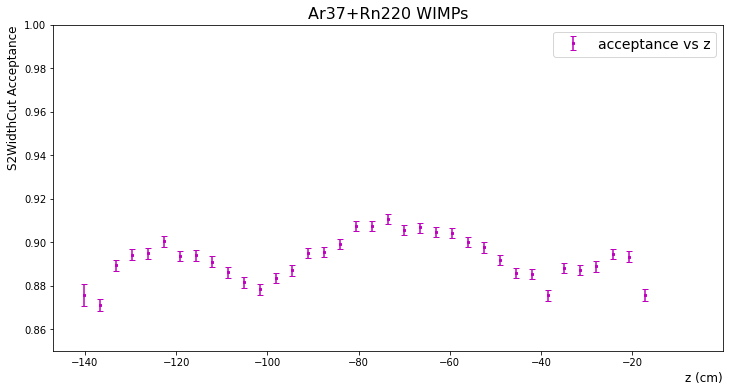

In [10]:
accWIMPs = wcu.get_acceptance(evWIMPs, evWIMPs['cut_s2_width_wire_modeled_wimps'], title='Ar37+Rn220 WIMPs', alim=(0.85,1))

In [11]:
ev_sim = np.load('/dali/lgrandi/shenyangshi/bdt_acceptance_0620.npy', allow_pickle=True).item()
ev_sim, ev_beta, ev_alpha = ev_sim['wfsim'], ev_sim['bkg_beta'], ev_sim['bkg_alpha']
ev_sim = ev_sim[FiducialVolume.cut_by(ev_sim)]

In [14]:
vd = get_correction_from_cmt('024075',('electron_drift_velocity', 'ONLINE', True))
gd = get_correction_from_cmt('024075',('electron_drift_time_gate', 'ONLINE', True))
dc = get_correction_from_cmt('024075',('electron_diffusion_cte', 'ONLINE', True))
par = (dc,vd,gd)
print(par)

(4.566e-08, 6.77e-05, 2700.0)


Fit lower boundary: [0.75785949 3.18263529 1.26349891]
Fit upper boundary: [4.74467848 1.34106577 1.99650474 1.02559667]


/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:654: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/home/valerioda/.local/lib/python3.8/site-packages/multihist-0.6.5-py3.8.egg/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


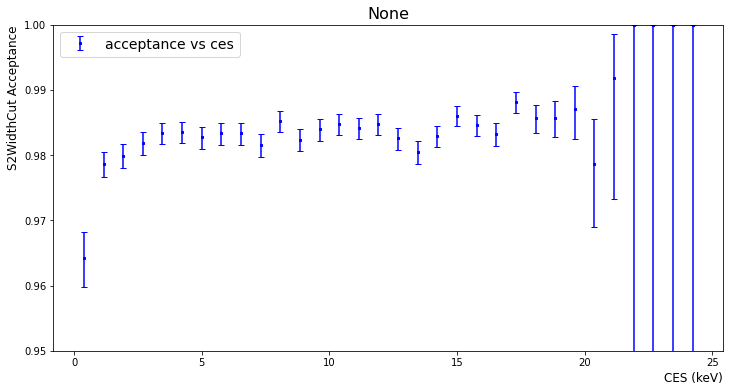

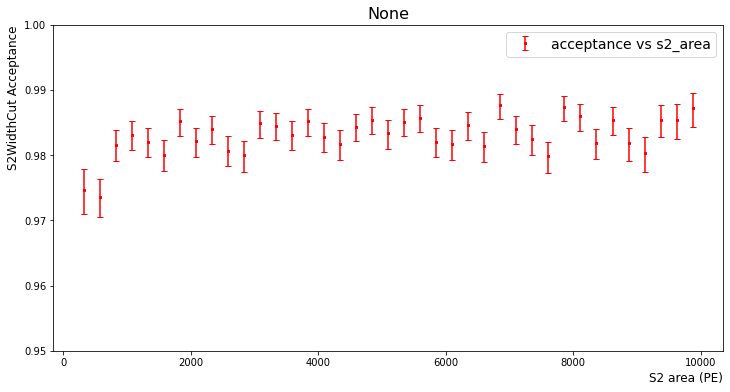

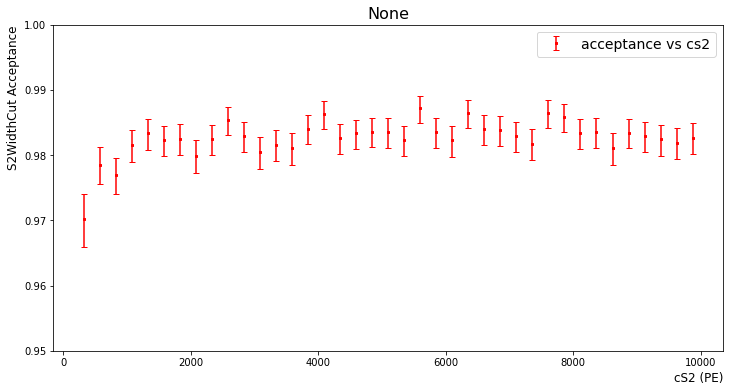

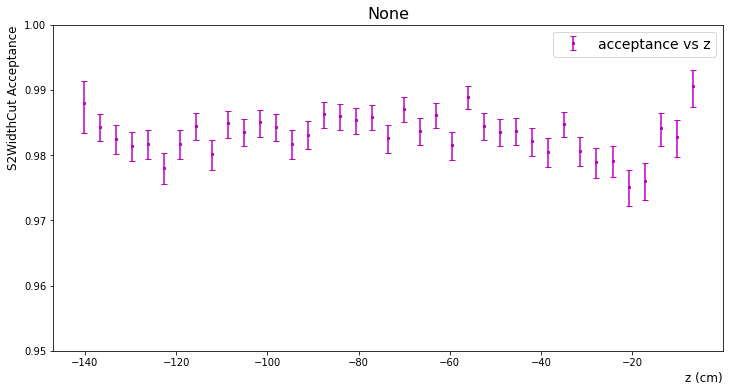

In [13]:
# FAR FROM WIRES 1-99%
cut_far, acc_sim_f = wcu.set_cut_on_data(ev_sim, par, width_type='50p', perc=(1,99),wrange=(0,6),
                                          alim=(0.95,1), afit=(2,4), acc_calc = 1)

Fit lower boundary: [0.7742574  2.92714807 1.22338626]
Fit upper boundary: [4.74467848 1.34106577 1.99650474 1.02559667]


/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:654: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/home/valerioda/.local/lib/python3.8/site-packages/multihist-0.6.5-py3.8.egg/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


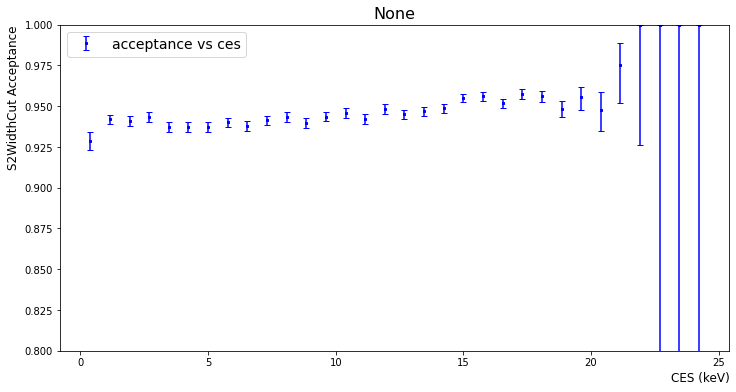

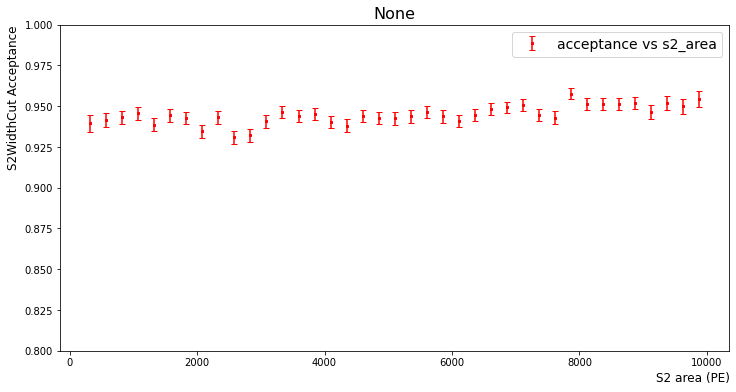

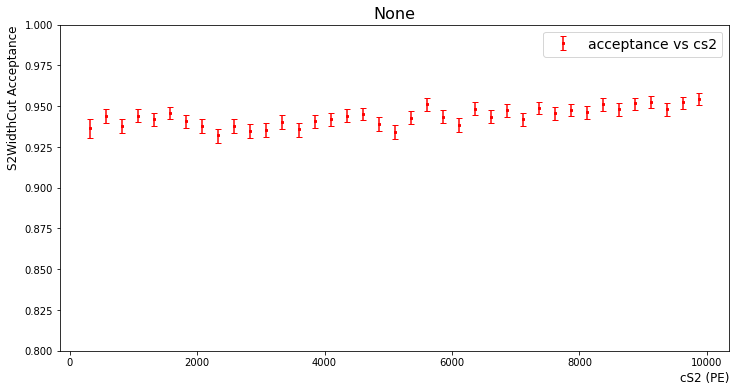

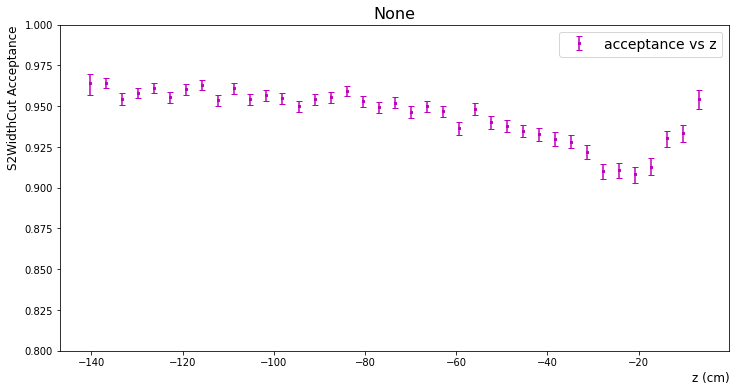

In [14]:
# NEAR WIRES WIMPs
cut_near, acc_sim_n = wcu.set_cut_on_data(ev_sim, par, width_type='50p',perc=(5,99),wrange=(0,6),
                                           alim=(0.8,1), afit=(2.,4), acc_calc=1)

In [15]:
NearWires = st.get_single_plugin('030000', 'cut_near_wires')
# get cut mask for WFsim near wires for LowER 1-99%
cut_mask_sim_low_er_near = wcu.S2WidthCut(ev_sim, title='WFsim near wires', mod_par=par, bins=400,
                                          wrange=(0,6), arange = (2.2,6.5), plot = 0, perc_plot=0,
                                          ext_par=cut_far, near_wires=1, wire_model=1 )
cut_mask_sim_low_er_near = cut_mask_sim_low_er_near[1]
# get cut mask for WFsim far from wires for LowER 1-99%
cut_mask_sim_low_er_far = wcu.S2WidthCut(ev_sim, title='WFsim far wires', mod_par=par, bins=400,
                                        wrange=(0,6), arange = (2.2,6.5), plot = 0, perc_plot=0,
                                        ext_par=cut_far)
cut_mask_sim_low_er_far = cut_mask_sim_low_er_far[1]
mask_near_wires = NearWires.cut_by(ev_sim)
cut_mask_sim_low_er_near[~mask_near_wires] = True
cut_mask_sim_low_er_far[mask_near_wires] = True 
cut_mask_sim_low_er = cut_mask_sim_low_er_near & cut_mask_sim_low_er_far

In [16]:
# get cut mask for WFsim near wires for WIMPs 1-99%
cut_mask_sim_wimps_near = wcu.S2WidthCut(ev_sim, title='WFsim near wires', mod_par=par, bins=400,
                                          wrange=(0,6), arange = (2.2,6.5), plot = 0, perc_plot=0,
                                          ext_par=cut_far, near_wires=1, wire_model=1 )
cut_mask_sim_wimps_near = cut_mask_sim_wimps_near[1]
# get cut mask for WFsim far from wires for WIMPs 5-99%
cut_mask_sim_wimps_far = wcu.S2WidthCut(ev_sim, title='WFsim far wires', mod_par=par, bins=400,
                                        wrange=(0,6), arange = (2.2,6.5), plot = 0, perc_plot=0,
                                        ext_par=cut_near)
cut_mask_sim_wimps_far = cut_mask_sim_wimps_far[1]
mask_near_wires = NearWires.cut_by(ev_sim)
cut_mask_sim_wimps_near[~mask_near_wires] = True
cut_mask_sim_wimps_far[mask_near_wires] = True 
cut_mask_sim_wimps = cut_mask_sim_wimps_near & cut_mask_sim_wimps_far

/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:654: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/home/valerioda/.local/lib/python3.8/site-packages/multihist-0.6.5-py3.8.egg/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


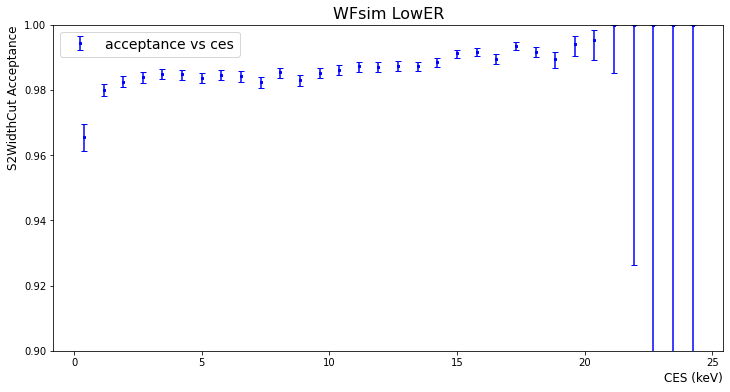

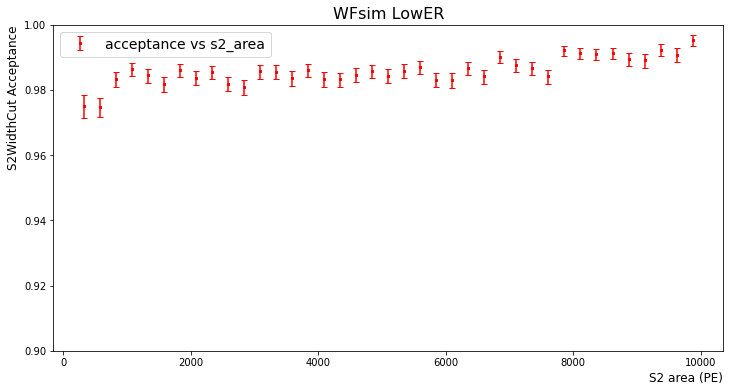

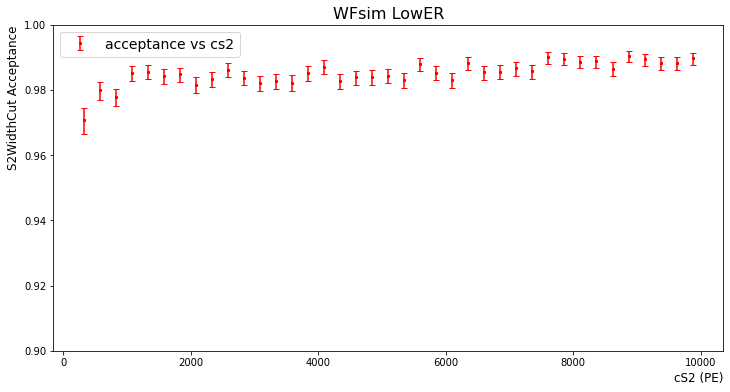

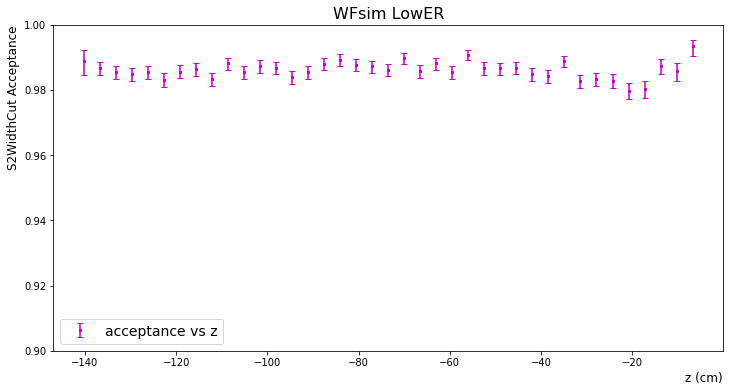

In [17]:
acc_sim_low_er = wcu.get_acceptance(ev_sim, cut_mask_sim_low_er, title='WFsim LowER', alim=(0.9,1))

/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:654: RuntimeWarning: invalid value encountered in long_scalars
  avg = k / n
/home/valerioda/.local/lib/python3.8/site-packages/multihist-0.6.5-py3.8.egg/multihist.py:106: RuntimeWarning: invalid value encountered in true_divide
  getattr(self.histogram, opname)(other),


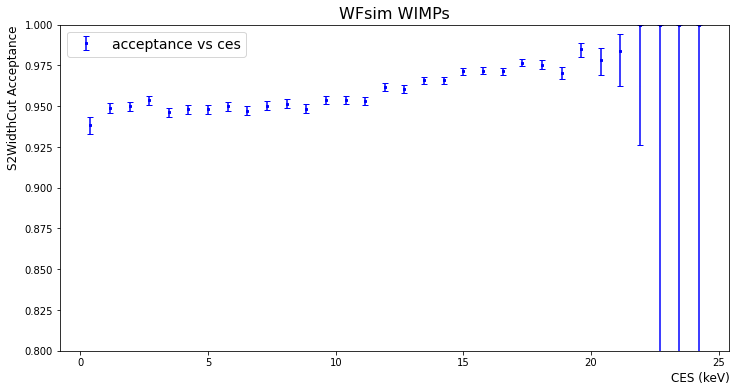

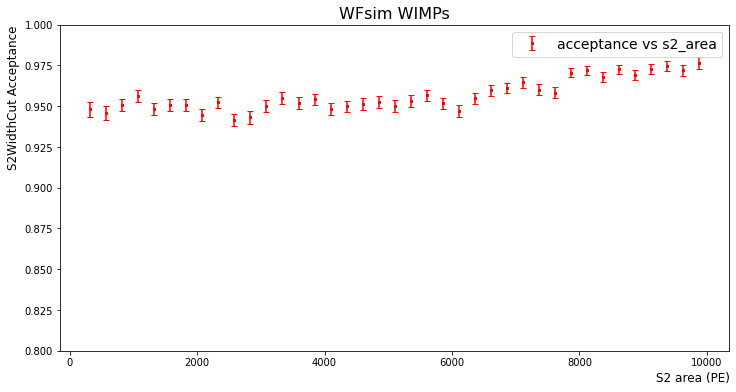

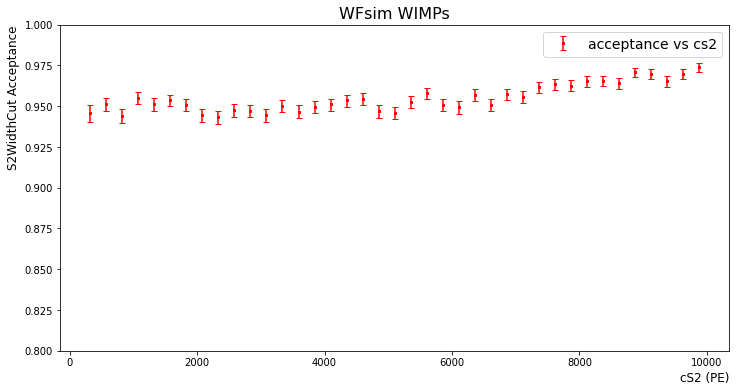

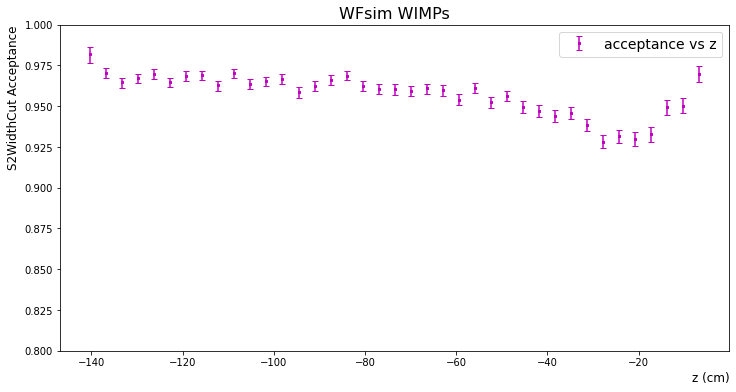

In [18]:
acc_sim_wimps = wcu.get_acceptance(ev_sim, cut_mask_sim_wimps, title='WFsim WIMPs', alim=(0.8,1))

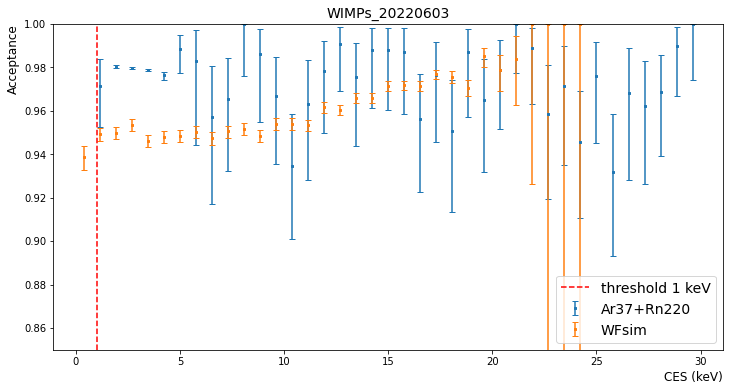

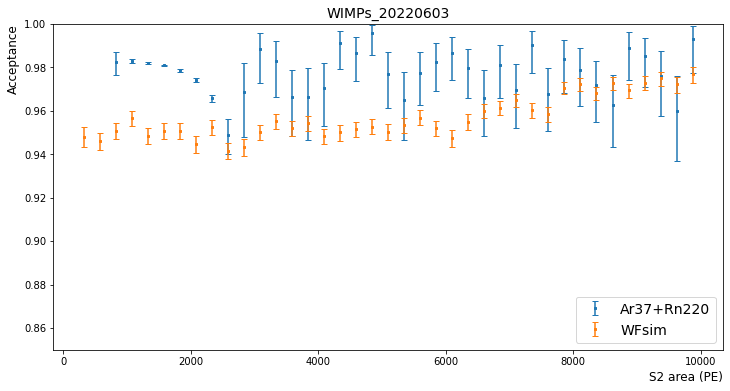

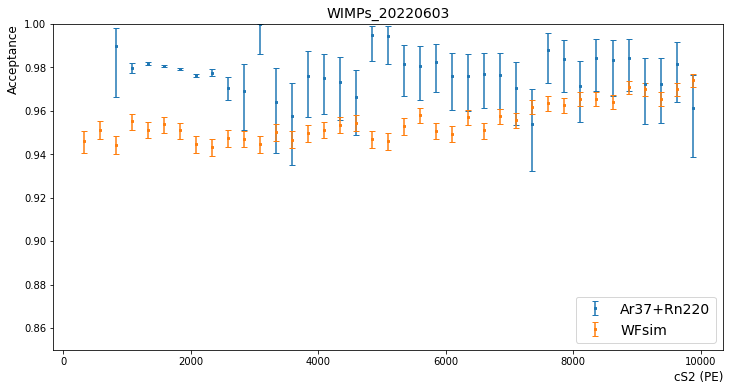

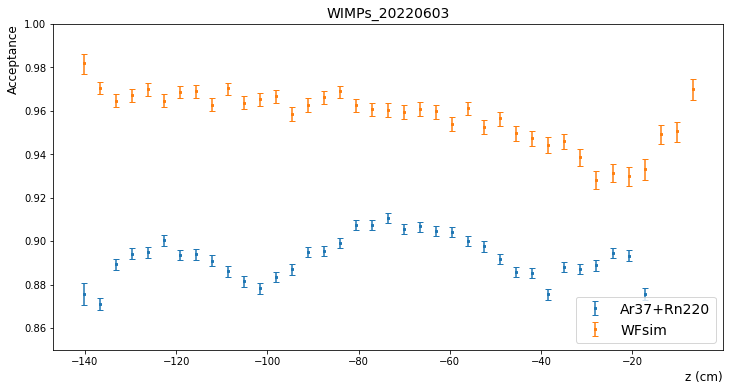

In [19]:
wcu.plot_acceptance(accWIMPs, acc_sim_wimps, alim=(0.85,1),title='WIMPs_20220603',
                    info='Ar37+Rn220',save=1)

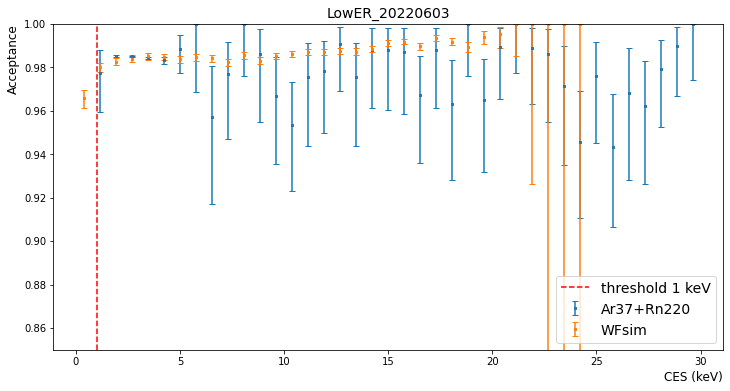

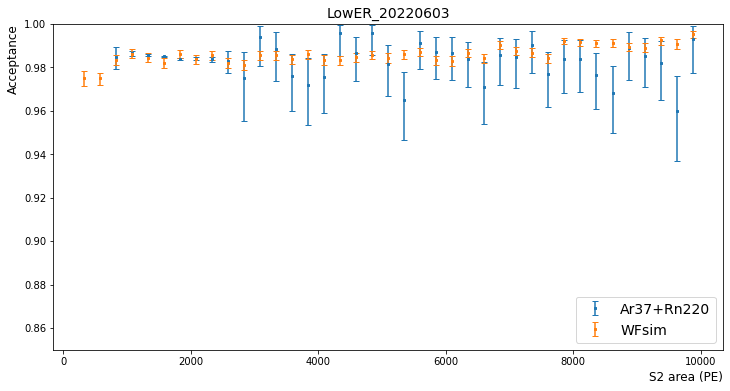

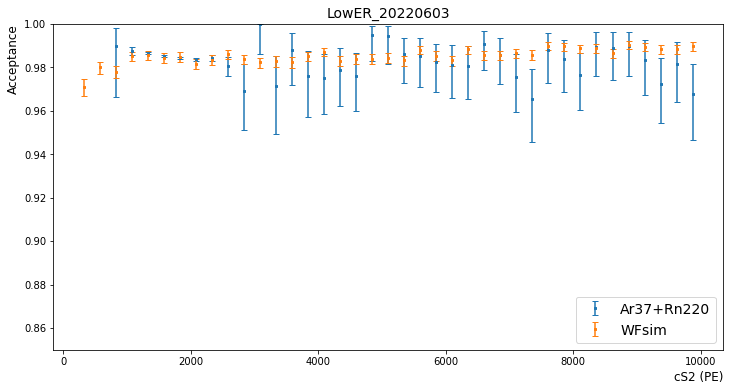

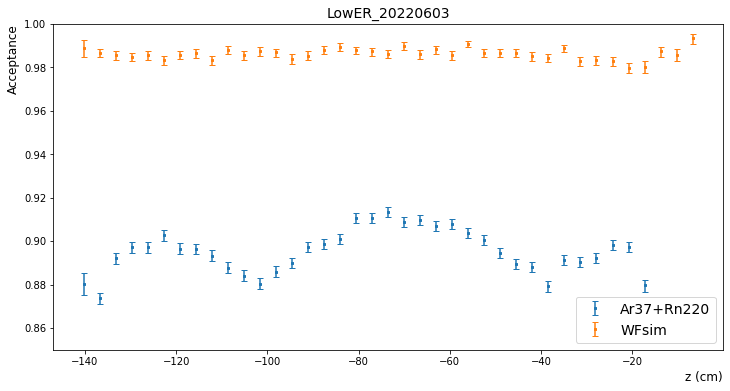

In [20]:
wcu.plot_acceptance(accLowER, acc_sim_low_er,alim=(0.85,1),
                    title='LowER_20220603',info='Ar37+Rn220',save=1)

In [30]:
accLowER.to_hdf('20220603_sr0_s2widthcut_Rn220_ar37_acceptance_v8_140keV.h5', key='df', mode='w')

In [24]:
acc_sim_low_er.to_hdf('20220603_sr0_s2widthcut_wfsim_acceptance.h5', key='df', mode='w')

In [25]:
accWIMPs.to_hdf('20220603_sr0_s2widthcut_Rn220_ar37_acceptance_v8_wimps.h5', key='df', mode='w')

In [26]:
acc_sim_wimps.to_hdf('20220603_sr0_s2widthcut_wfsim_acceptance_wimps.h5', key='df', mode='w')

# BACKGROUND STUDY

In [9]:
dsets = st.select_runs(include_tags='_sr0',run_mode='background_linked',available='event_info',
                      exclude_tags=('bad','messy','hot_spot','ramp_up'))

In [11]:
bkg_runs = dsets.name.values[:]
print(len(bkg_runs))

3629


In [17]:
evbkg = ddu.merge_runs(st,bkg_runs[:1000])

Reading runs from 030076 to 031833
n. 4 run 031827 elapsed time: 0.29 s
n. 9 run 031822 elapsed time: 0.70 s
n. 14 run 031817 elapsed time: 1.14 s
n. 19 run 031812 elapsed time: 1.59 s
n. 24 run 031807 elapsed time: 2.08 s
n. 29 run 031802 elapsed time: 2.59 s
n. 34 run 031797 elapsed time: 3.65 s
n. 39 run 031792 elapsed time: 4.73 s
n. 44 run 031787 elapsed time: 5.83 s
n. 49 run 031782 elapsed time: 7.20 s
n. 54 run 031777 elapsed time: 8.42 s
n. 59 run 031772 elapsed time: 9.64 s
n. 64 run 031767 elapsed time: 10.95 s
n. 69 run 031762 elapsed time: 12.27 s
n. 74 run 031757 elapsed time: 13.73 s
n. 79 run 031752 elapsed time: 15.28 s
n. 84 run 031747 elapsed time: 16.93 s
n. 89 run 031742 elapsed time: 18.63 s
n. 94 run 031737 elapsed time: 20.37 s
n. 99 run 031732 elapsed time: 22.22 s
n. 104 run 031727 elapsed time: 24.12 s
n. 109 run 031722 elapsed time: 26.24 s
n. 114 run 031716 elapsed time: 28.44 s
n. 119 run 031711 elapsed time: 30.71 s
n. 124 run 031706 elapsed time: 33.05 s

In [18]:
ddir = '/dali/lgrandi/dandrea/data'
evbkg.to_pickle(f'{ddir}/SR0_bkg_{bkg_runs[0]}_{bkg_runs[1000]}_EventInfo.pkl')
#evbkg = pd.read_pickle(f'{ddir}/SR0_bkg_{bkg_runs[0]}_{bkg_runs[1000]}_EventInfo.pkl')

/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


total events 1154841
Lower and higher boundary provided externally
param_parabola_low: [0.00487747 0.09634786 0.19632401]
param_parabola_high: [ 0.12086553 -1.2295208   4.37596581]
Cut: total 1154841, survived 809063 -> 70.06%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


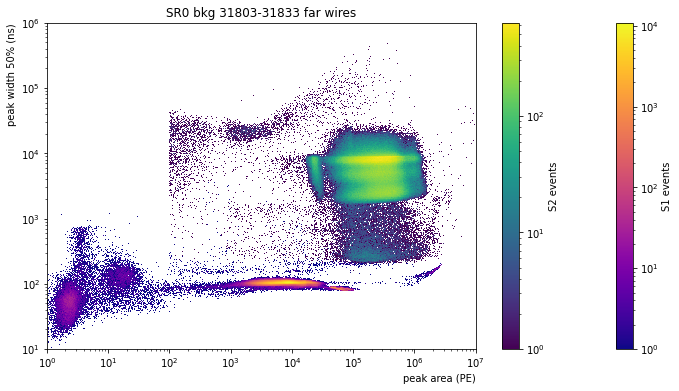

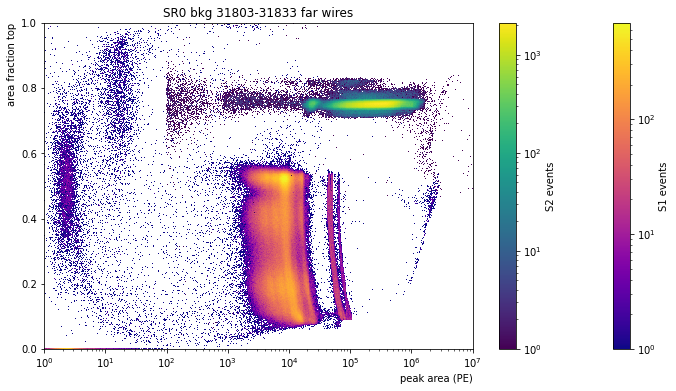

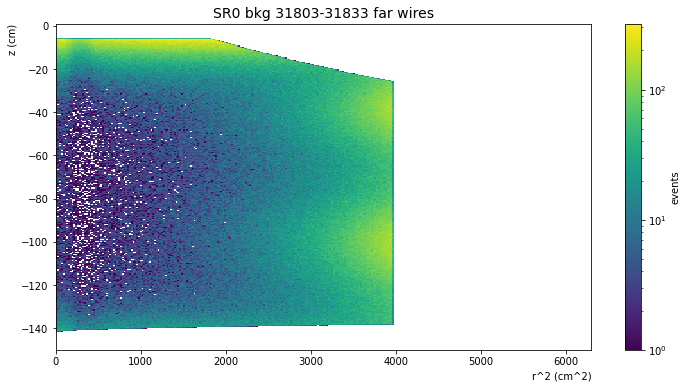

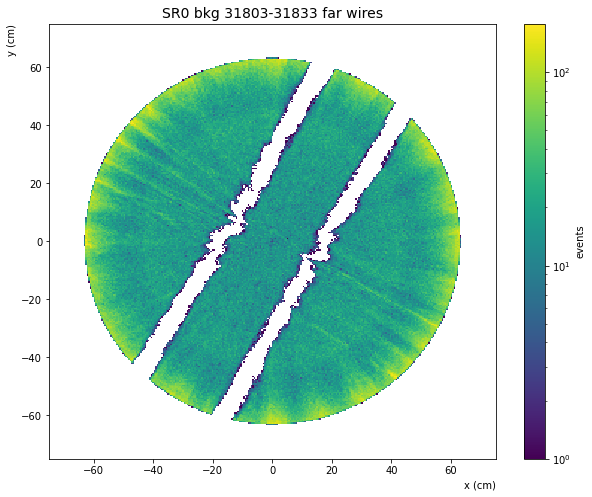

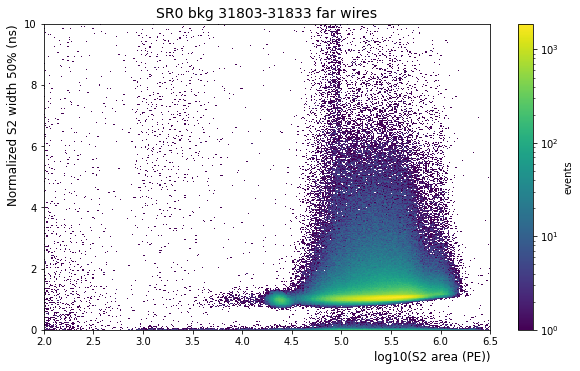

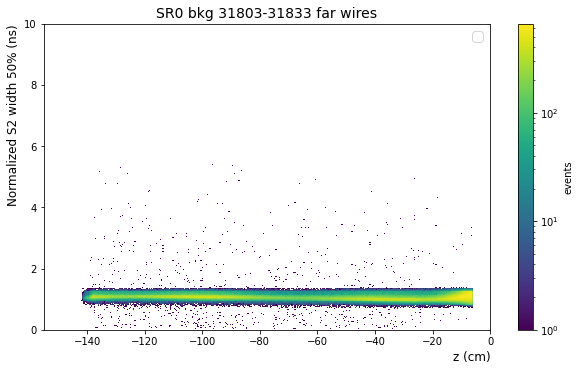

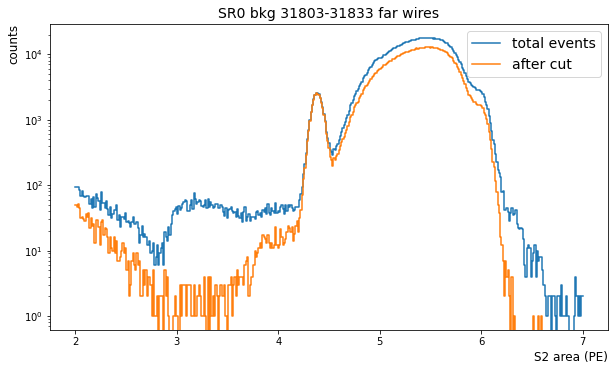

In [20]:
fit_par = (( 0.75785949,3.18263529,1.26349891), ( 4.74467848,1.34106577,1.99650474,1.02559667 ))
maskFW, maskNW = wcu.mask_S2Width_vs_pos(evbkg)
#maskFV = ddu.mask_FV(evbkg0)
FiducialVolume = st.get_single_plugin('030000', 'cut_fiducial_volume')
maskFV = FiducialVolume.cut_by(evbkg)
evv = evbkg[maskFW & maskFV]
title='SR0 bkg 31803-31833 far wires'
ddu.plot_area_width_aft(evv, title)
wcu.plot_r2z_xy(evv,title)
cut_ = wcu.S2WidthCut(evv, title=title, mod_par=par, bins=400,ext_par=fit_par,
                      wrange=(0,10), arange = (2.,6.5), plot = 1, perc_plot=0)